In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import uproot
import awkward as ak

In [2]:
data_path = "/disk/atlas3/data_MC/ATLASOpen/jets/part1.root" 

These are some examples of how to look at root files using uproot and awkward arrays. More info in this tutorial:
https://hub.gke2.mybinder.org/user/jpivarski-2020--ep2020-tutorial-7h7oraqf/lab/tree/tutorial.ipynb


In [3]:
#Open file in with-function will close it when you exit
def look(rootfile:str):
    with uproot.open(rootfile) as file:
        keys = file.keys()
        print(keys)
        print(file[keys[0]].show())

look(data_path)

['JetRecoTree;64', 'JetRecoTree;63']
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
EventNumber          | uint64_t                 | AsDtype('>u8')
RunNumber            | uint64_t                 | AsDtype('>u8')
EventWeight          | float                    | AsDtype('>f4')
mu_average           | float                    | AsDtype('>f4')
mu_actual            | float                    | AsDtype('>f4')
NPV                  | uint32_t                 | AsDtype('>u4')
Tracks_pt            | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
Tracks_eta           | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
Tracks_phi           | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
Tracks_m             | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
Tracks_vtx           | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
Cluste

In [4]:
tree = uproot.open(data_path+":JetRecoTree")
events = tree.arrays(library="ak", how="zip")

In [5]:
clusters = events["Clusters", ["pt", "eta", "phi", "m"]]

In [6]:
clusters["pz"] = clusters["pt"]*np.sinh(clusters["eta"])
clusters["px"] = clusters["pt"]*np.cos(clusters["phi"])
clusters["py"] = clusters["pt"]*np.sin(clusters["phi"])

KeyboardInterrupt: 

In [ ]:
clusters["n_jets"] = ak.num(events["TruthJets_R10"])

In [ ]:
df = ak.to_pandas(clusters)

In [ ]:
df

pt       eta       phi    m            pz  \
entry  subentry                                                        
0      0         1.421528e+06  0.714265  1.333796  0.0  1.103911e+06   
       1         6.517377e+05  0.568533 -1.618835  0.0  3.908210e+05   
       2         2.241711e+05  0.576099 -1.610709  0.0  1.364079e+05   
       3         1.830920e+05  0.603998 -1.703963  0.0  1.174349e+05   
       4         1.031376e+05  1.668080 -2.416825  0.0  2.636903e+05   
...                       ...       ...       ...  ...           ...   
102899 1095      6.955143e+00  1.647566  0.922712  0.0  1.739414e+01   
       1096      6.081739e+00  1.360646  2.106574  0.0  1.107550e+01   
       1097      2.412975e+00  2.249187 -1.116033  0.0  1.131026e+01   
       1098      1.917974e+00  0.477284  2.463612  0.0  9.505724e-01   
       1099      1.669672e+00 -0.444126  0.846903  0.0 -7.661647e-01   

                            px            py  n_jets  
entry  subentry                                       
0      0         333757.406250  1.381791e+06       3  
       1         -31296.867188 -6.509858e+05       3  
       2          -8944.910156 -2.239926e+05       3  
       3         -24309.705078 -1.814710e+05       3  
       4         -77214.320312 -6.837632e+04       3  
...                        ...           ...     ...  
102899 1095           4.198543  5.544931e+00       0  
       1096          -3.104789  5.229516e+00       0  
       1097           1.059899 -2.167732e+00       0  
       1098          -1.493796  1.202995e+00       0  
       1099           1.105835  1.250973e+00       0  

[60730939 rows x 8 columns]

[18154  3300 53127 22309  5166   763    81] [0. 1. 2. 3. 4. 5. 6. 7.]


Text(0.5, 1.0, 'Jet multiplicity')

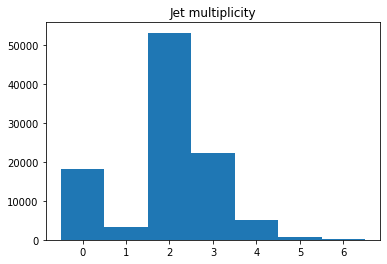

In [ ]:
n_jets = ak.num(events["TruthJets_R10"])
counts, bins = np.histogram(n_jets, bins=7)
print(counts, bins)
plt.hist(bins[:-1], bins, weights=counts, align="left")
plt.title("Jet multiplicity")

In [ ]:
ids = ak.num(events.Particles.pdgID)
jet_const = ak.num(events.Clusters.pt)
print(ids)
print(events.Particles.pdgID[1])
print(events.NPV)
print(n_jets)

[498, 670, 621, 446, 310, 523, 517, 537, ... 580, 477, 494, 401, 472, 270, 459, 631]
[321, 211, -211, -321, 211, 211, -211, -211, ... 22, 211, -211, -211, 211, 22, 22]
[23, 13, 14, 21, 12, 12, 16, 17, 27, 25, ... 19, 29, 26, 25, 21, 26, 18, 24, 23, 28]
[3, 3, 2, 0, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, ... 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 0, 2, 0]
